In [1]:
import zipfile
import os

# Path to the zip file
zip_path = '/content/archive (1).zip'
# Destination directory
extract_path = '/content/Breast_cancer_dataset/'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done!")


Unzipping done!


In [2]:
# List the contents
contents = os.listdir(extract_path)
print("Breast_cancer_dataset:")
for item in contents:
    print(item)





Breast_cancer_dataset:
Dataset_BUSI_with_GT


In [3]:
# Check for labels and annotations
label_files = []
annotation_files = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if 'label' in file.lower():
            label_files.append(os.path.join(root, file))
        if 'annotation' in file.lower():
            annotation_files.append(os.path.join(root, file))

print("Label files found:")
for label in label_files:
    print(label)

print("Annotation files found:")
for annotation in annotation_files:
    print(annotation)


Label files found:
Annotation files found:


In [4]:
import os

# Define paths to the train and test directories
train_path = '/content/Alzheimer Dataset/Alzheimer_s Dataset/train'
test_path = '/content/Alzheimer Dataset/Alzheimer_s Dataset/test'

# Function to count images in subfolders
def count_images_in_subfolders(directory):
    subfolder_counts = {}
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            folder_path = os.path.join(root, dir_name)
            image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
            subfolder_counts[dir_name] = image_count
    return subfolder_counts

# Count images in train and test subfolders
train_image_counts = count_images_in_subfolders(train_path)
test_image_counts = count_images_in_subfolders(test_path)

# Print the number of images per label in train and test sets
print("Number of images per label in train set:")
for label, count in train_image_counts.items():
    print(f"{label}: {count}")

print("\nNumber of images per label in test set:")
for label, count in test_image_counts.items():
    print(f"{label}: {count}")


Number of images per label in train set:

Number of images per label in test set:


In [5]:
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split

# Define paths to the dataset directories
base_path = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT'
benign_path = os.path.join(base_path, 'benign')
malignant_path = os.path.join(base_path, 'malignant')
normal_path = os.path.join(base_path, 'normal')

# Define new paths for train, test, and validation sets
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
val_path = os.path.join(base_path, 'validation')

# Create directories if they don't exist
for path in [train_path, test_path, val_path]:
    if not os.path.exists(path):
        os.makedirs(path)
    for class_name in ['benign', 'malignant', 'normal']:
        class_path = os.path.join(path, class_name)
        if not os.path.exists(class_path):
            os.makedirs(class_path)

# Function to split dataset and move files
def split_and_move_images(class_path, class_name):
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith('.png')]
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    # Move images to respective directories
    for img in train_images:
        shutil.move(img, os.path.join(train_path, class_name, os.path.basename(img)))
    for img in test_images:
        shutil.move(img, os.path.join(test_path, class_name, os.path.basename(img)))
    for img in val_images:
        shutil.move(img, os.path.join(val_path, class_name, os.path.basename(img)))

# Split and move images for each class
split_and_move_images(benign_path, 'benign')
split_and_move_images(malignant_path, 'malignant')
split_and_move_images(normal_path, 'normal')

print("Train, test, and validation sets created.")


Train, test, and validation sets created.


In [6]:
import os

# Define paths to the train and test directories
train_path = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train'
test_path = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test'
val_path='/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation'

# Function to count images in subfolders
def count_images_in_subfolders(directory):
    subfolder_counts = {}
    for root, dirs, files in os.walk(directory):
        for dir_name in dirs:
            folder_path = os.path.join(root, dir_name)
            image_count = len([name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))])
            subfolder_counts[dir_name] = image_count
    return subfolder_counts

# Count images in train and test subfolders
train_image_counts = count_images_in_subfolders(train_path)
test_image_counts = count_images_in_subfolders(test_path)

# Print the number of images per label in train and test sets
print("Number of images per label in train set:")
for label, count in train_image_counts.items():
    print(f"{label}: {count}")

print("\nNumber of images per label in test set:")
for label, count in test_image_counts.items():
    print(f"{label}: {count}")


Number of images per label in train set:
malignant: 252
benign: 534
normal: 159

Number of images per label in test set:
malignant: 85
benign: 179
normal: 54


In [7]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.2 MB/s eta 0:00:00


In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths to the dataset directories
train_path = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train'
test_path = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test'
val_path = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation'

# Function to load images from a directory into numpy arrays
def load_images_from_class_folders(base_path, target_size=(224, 224)):
    images = []
    labels = []
    for class_name in ['benign', 'malignant', 'normal']:
        class_path = os.path.join(base_path, class_name)
        if not os.path.isdir(class_path):
            print(f"Directory not found: {class_path}")
            continue
        print(f"Loading images from: {class_path}")
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            if os.path.isfile(img_path) and img_name.endswith('.png'):
                try:
                    img = load_img(img_path, target_size=target_size)
                    img_array = img_to_array(img)
                    images.append(img_array)
                    labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    print(f"Loaded {len(images)} images from {base_path}")
    return np.array(images), np.array(labels)

# Load images and labels
X_train, y_train = load_images_from_class_folders(train_path)
X_val, y_val = load_images_from_class_folders(val_path)
X_test, y_test = load_images_from_class_folders(test_path)

# Check if data is loaded correctly
print(f"Train X shape: {X_train.shape}")
print(f"Train y shape: {y_train.shape}")
print(f"Validation X shape: {X_val.shape}")
print(f"Validation y shape: {y_val.shape}")
print(f"Test X shape: {X_test.shape}")
print(f"Test y shape: {y_test.shape}")

# Encode labels to numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Normalize images
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0


Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/benign
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/malignant
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/normal
Loaded 945 images from /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/benign
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/malignant
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/normal
Loaded 315 images from /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test/benign
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test/malignant
Loading images from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test/normal
Loaded 318 images from /content/Breast

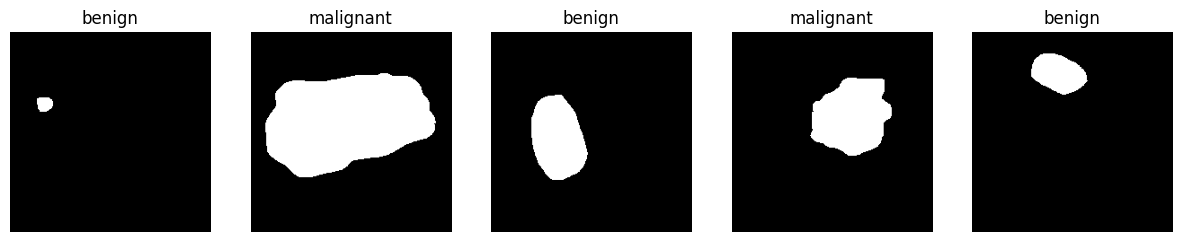

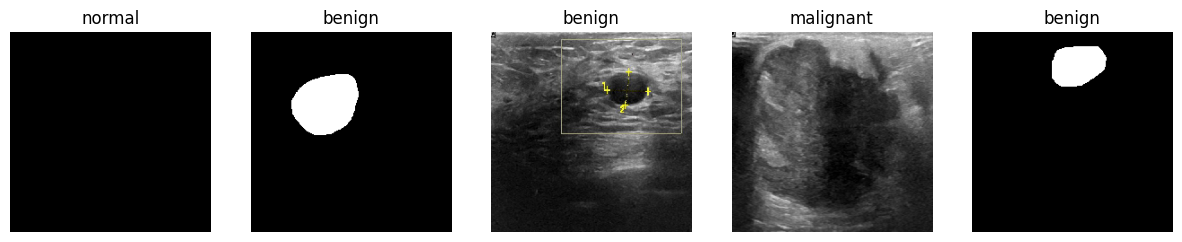

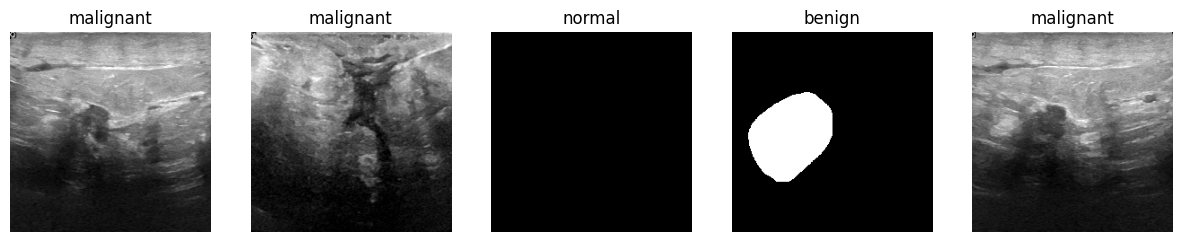

In [9]:
import matplotlib.pyplot as plt

# Function to display sample images with their labels
def display_sample_images(images, labels, label_encoder, num_samples=5):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx])
        plt.title(label_encoder.inverse_transform([labels[idx]])[0])
        plt.axis('off')
    plt.show()

# Display sample images from the training set
display_sample_images(X_train, y_train_encoded, label_encoder, num_samples=5)

# Display sample images from the validation set
display_sample_images(X_val, y_val_encoded, label_encoder, num_samples=5)

# Display sample images from the test set
display_sample_images(X_test, y_test_encoded, label_encoder, num_samples=5)


Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/benign and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/benign
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/malignant and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/malignant
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/normal and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/normal
Loaded 280 images and masks from /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/benign and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/benign
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/malignant and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/malignant
Loading images and masks from: /content/Breast_cance

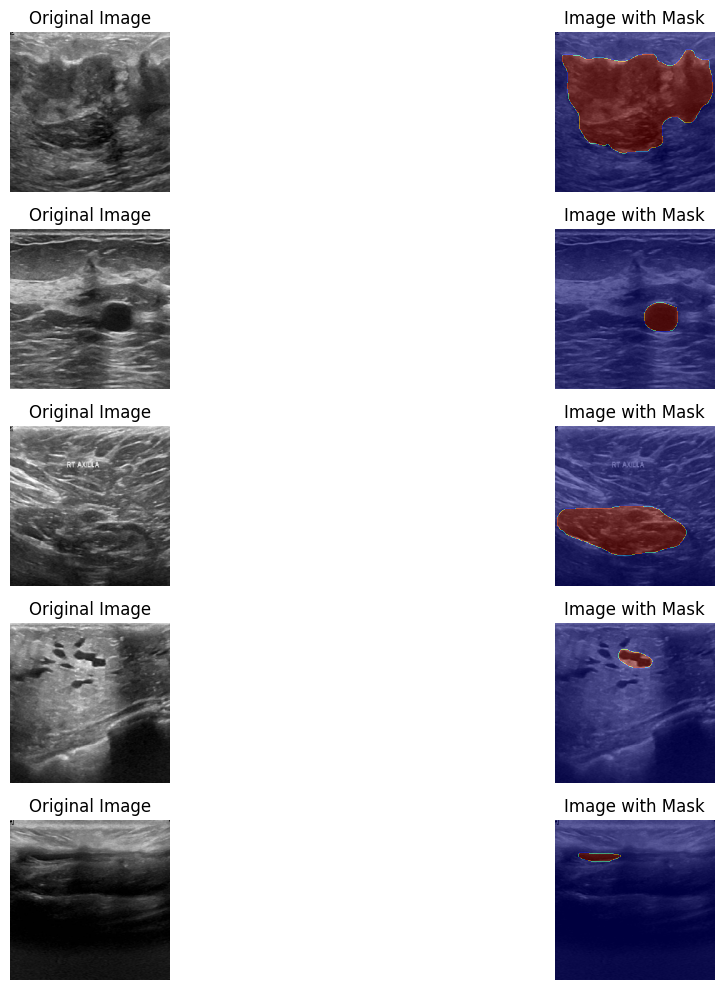

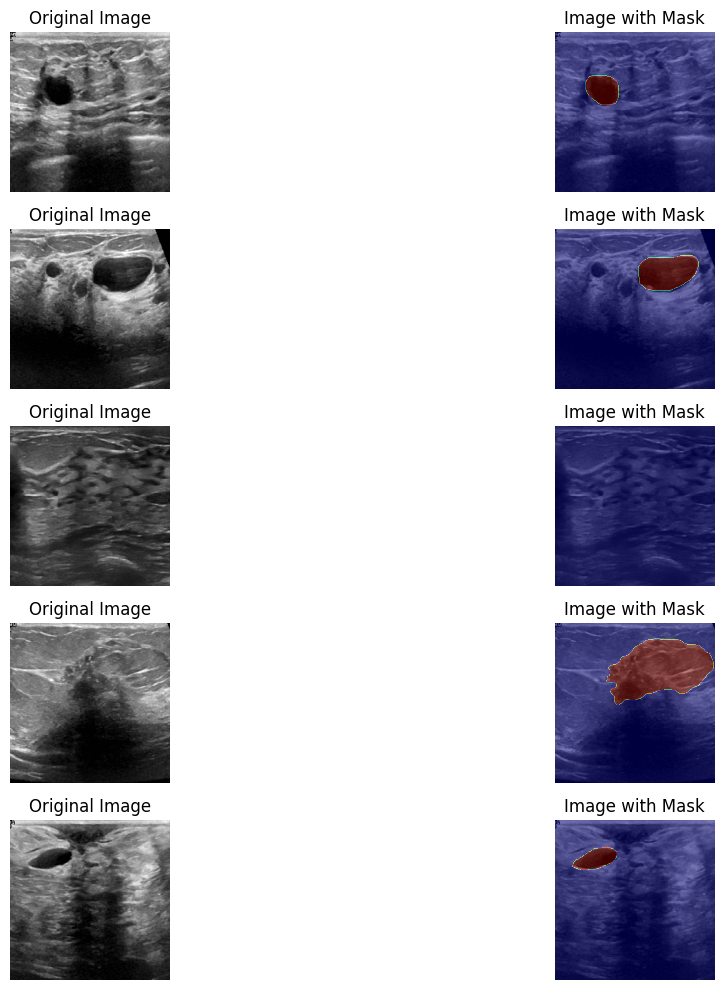

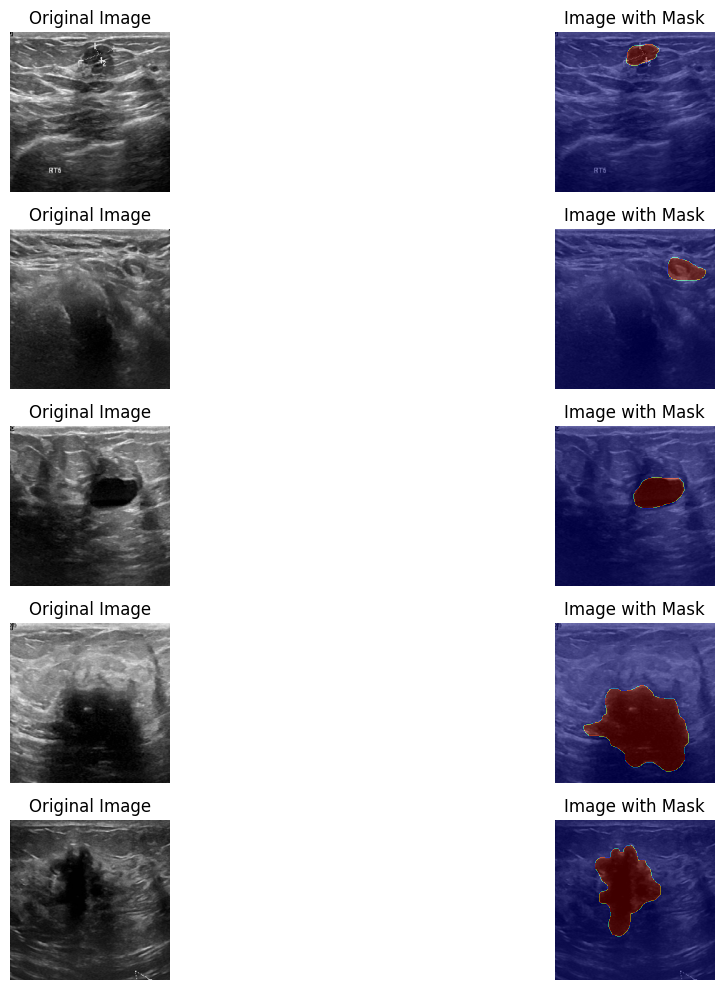

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Define paths to the dataset directories
train_img_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train'
train_mask_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train'  # Assuming masks are in the same folder with '_mask' suffix

val_img_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation'
val_mask_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation'

test_img_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test'
test_mask_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test'

def load_images_and_masks(base_img_path, base_mask_path, target_size=(224, 224)):
    images = []
    masks = []
    for class_name in ['benign', 'malignant', 'normal']:
        img_class_path = os.path.join(base_img_path, class_name)
        mask_class_path = os.path.join(base_mask_path, class_name)
        if not os.path.isdir(img_class_path):
            print(f"Image directory not found: {img_class_path}")
            continue
        if not os.path.isdir(mask_class_path):
            print(f"Mask directory not found: {mask_class_path}")
            continue
        print(f"Loading images and masks from: {img_class_path} and {mask_class_path}")
        for img_name in os.listdir(img_class_path):
            img_path = os.path.join(img_class_path, img_name)
            mask_path = os.path.join(mask_class_path, img_name.replace('.png', '_mask.png').replace('.jpg', '_mask.png'))
            if os.path.isfile(img_path) and os.path.isfile(mask_path):
                try:
                    img = load_img(img_path, target_size=target_size)
                    img_array = img_to_array(img)
                    mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
                    mask_array = img_to_array(mask)
                    images.append(img_array)
                    masks.append(mask_array)
                except Exception as e:
                    print(f"Error loading image/mask {img_path}/{mask_path}: {e}")
    print(f"Loaded {len(images)} images and masks from {base_img_path}")
    return np.array(images), np.array(masks)

# Load images and masks
X_train, y_train_masks = load_images_and_masks(train_img_dir, train_mask_dir)
X_val, y_val_masks = load_images_and_masks(val_img_dir, val_mask_dir)
X_test, y_test_masks = load_images_and_masks(test_img_dir, test_mask_dir)

# Check if data is loaded correctly
print(f"Train X shape: {X_train.shape}")
print(f"Train mask shape: {y_train_masks.shape}")
print(f"Validation X shape: {X_val.shape}")
print(f"Validation mask shape: {y_val_masks.shape}")
print(f"Test X shape: {X_test.shape}")
print(f"Test mask shape: {y_test_masks.shape}")

# Normalize images
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Function to display original and masked images
def display_images_with_masks(images, masks, num_samples=5):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(images[idx])
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(images[idx])
        plt.imshow(masks[idx].squeeze(), cmap='jet', alpha=0.5)  # Overlay mask with transparency
        plt.title('Image with Mask')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images with masks from the training set
display_images_with_masks(X_train, y_train_masks, num_samples=5)

# Display sample images with masks from the validation set
display_images_with_masks(X_val, y_val_masks, num_samples=5)

# Display sample images with masks from the test set
display_images_with_masks(X_test, y_test_masks, num_samples=5)


In [11]:
# Ensure masks are binary (0 or 1)
y_train_masks = (y_train_masks > 0).astype(np.uint8)
y_val_masks = (y_val_masks > 0).astype(np.uint8)
y_test_masks = (y_test_masks > 0).astype(np.uint8)

# Check the shapes and unique values of masks to ensure they are binary
print(f"Train mask unique values: {np.unique(y_train_masks)}")
print(f"Validation mask unique values: {np.unique(y_val_masks)}")
print(f"Test mask unique values: {np.unique(y_test_masks)}")


Train mask unique values: [0 1]
Validation mask unique values: [0 1]
Test mask unique values: [0 1]


In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.models import Model

def unet_model(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
input_shape = (224, 224, 3)
model = unet_model(input_shape)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 224, 224, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 224, 224, 64)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 224, 224, 64)         36928     ['dropout[0][0]']             
                                                                                              

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define paths to the dataset directories
train_img_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train'
train_mask_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train'  # Assuming masks are in the same folder with '_mask' suffix

val_img_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation'
val_mask_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation'

test_img_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test'
test_mask_dir = '/content/Breast_cancer_dataset/Dataset_BUSI_with_GT/test'

def load_images_and_masks(base_img_path, base_mask_path, target_size=(224, 224)):
    images = []
    masks = []
    for class_name in ['benign', 'malignant', 'normal']:
        img_class_path = os.path.join(base_img_path, class_name)
        mask_class_path = os.path.join(base_mask_path, class_name)
        if not os.path.isdir(img_class_path):
            print(f"Image directory not found: {img_class_path}")
            continue
        if not os.path.isdir(mask_class_path):
            print(f"Mask directory not found: {mask_class_path}")
            continue
        print(f"Loading images and masks from: {img_class_path} and {mask_class_path}")
        for img_name in os.listdir(img_class_path):
            img_path = os.path.join(img_class_path, img_name)
            mask_path = os.path.join(mask_class_path, img_name.replace('.png', '_mask.png').replace('.jpg', '_mask.png'))
            if os.path.isfile(img_path) and os.path.isfile(mask_path):
                try:
                    img = load_img(img_path, target_size=target_size)
                    img_array = img_to_array(img)
                    mask = load_img(mask_path, target_size=target_size, color_mode='grayscale')
                    mask_array = img_to_array(mask)
                    images.append(img_array)
                    masks.append(mask_array)
                except Exception as e:
                    print(f"Error loading image/mask {img_path}/{mask_path}: {e}")
    print(f"Loaded {len(images)} images and masks from {base_img_path}")
    return np.array(images), np.array(masks)

# Load images and masks
X_train, y_train_masks = load_images_and_masks(train_img_dir, train_mask_dir)
X_val, y_val_masks = load_images_and_masks(val_img_dir, val_mask_dir)
X_test, y_test_masks = load_images_and_masks(test_img_dir, test_mask_dir)

# Ensure masks are binary (0 or 1)
y_train_masks = (y_train_masks > 0).astype(np.uint8)
y_val_masks = (y_val_masks > 0).astype(np.uint8)
y_test_masks = (y_test_masks > 0).astype(np.uint8)

# Normalize images
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Define the U-Net model
def unet_model(input_size=(224, 224, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = UpSampling2D((2, 2))(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = UpSampling2D((2, 2))(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = UpSampling2D((2, 2))(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = UpSampling2D((2, 2))(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
input_shape = (224, 224, 3)
model = unet_model(input_shape)

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train_masks,
    epochs=20,  # Adjust the number of epochs as needed
    batch_size=32,
    validation_data=(X_val, y_val_masks)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_masks)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Convert predicted masks to binary format
threshold = 0.5
predicted_masks = model.predict(X_test)
predicted_masks_binary = (predicted_masks > threshold).astype(np.uint8)

# Flatten the masks to compute metrics
y_test_flat = y_test_masks.flatten()
predicted_masks_flat = predicted_masks_binary.flatten()

# Generate classification report
class_report = classification_report(y_test_flat, predicted_masks_flat, target_names=['Background', 'Disease'])
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_flat, predicted_masks_flat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Background', 'Disease'], yticklabels=['Background', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/benign and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/benign
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/malignant and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/malignant
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/normal and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train/normal
Loaded 280 images and masks from /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/train
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/benign and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/benign
Loading images and masks from: /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/malignant and /content/Breast_cancer_dataset/Dataset_BUSI_with_GT/validation/malignant
Loading images and masks from: /content/Breast_cance